In [ ]:
import os
import shutil
import random
import numpy
import numpy as np
import cv2
import shutil
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from ultralytics import YOLO
#print(YOLO('yolo11n.pt'))
import torch
import pandas as pd
import seaborn as sns
import yaml

print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.current_device())
print(torch.cuda.get_device_name(0))

True
1
0
NVIDIA GeForce RTX 4080


In [ ]:
#pip install ultralytics

In [ ]:
# We start with counting the instances per each class to check the dataset's balance

dataset_path = "J:/xView"

# Dictionary to count the instances of each class
class_counts = {}

# Function to count the instances
def count_classes_in_annotations(dataset_path):

    images_folder = os.path.join(dataset_path, 'images')  # Assuming that the images are in the 'images' folder
    annotations_folder = os.path.join(dataset_path, 'labels')  # Assuming that the labels are in the 'labels' folder

    # Goes through each file in the labels folder
    for annotation_file in os.listdir(annotations_folder):
        annotation_path = os.path.join(annotations_folder, annotation_file)

        # Opens and reads the label
        with open(annotation_path, 'r') as f:
            lines = f.readlines()

            for line in lines:
                # Every row is a label, thus takes the class_id (first element of a label of the YOLO type)
                class_id = int(line.split()[0])

                # Increments the count for that class
                if class_id in class_counts:
                    class_counts[class_id] += 1
                else:
                    class_counts[class_id] = 1

    # Prints the result
    print("Numero di istanze per ogni classe:")
    for class_id, count in class_counts.items():
        print(f"Classe {class_id}: {count} istanze")


count_classes_in_annotations(dataset_path)


Numero di istanze per ogni classe:
Classe 1: 8141 istanze
Classe 0: 1852 istanze
Classe 2: 30267 istanze


In [ ]:
# Considering the strong inbalance of the classes 1 and 0, respectively Airplane and Ship, here only the images that present those two classes will be counter

dataset_path = "J:/xView/images/"
annotations_path = "J:/xView/labels/"

# List for the class 1 and 0 images
valid_images = []

# Iterates through all the images
for image_name in os.listdir(dataset_path):
    # Checks that a file is a jpg
    if image_name.endswith(".jpg"):
        # Gets the name of the corresponding label file
        annotation_file = os.path.join(annotations_path, image_name.replace(".jpg", ".txt"))

        if os.path.exists(annotation_file):
            # Reads the label
            with open(annotation_file, 'r') as f:
                # Gets all the classes in an image
                classes_in_image = [line.split()[0] for line in f.readlines()]

                # If all the classes are 0 or 1, adds the image to the aforementioned list
                if all(cls == '0' or cls == '1' for cls in classes_in_image):
                    valid_images.append(image_name)

# Prints the result
print(f"Numero di immagini con solo classi 0 e 1: {len(valid_images)}")


Numero di immagini con solo classi 0 e 1: 835


In [ ]:
#Applying an oversampling, duplicating the images that present the minority classes

source_images_dir = "J:/xView/images/"
source_labels_dir = "J:/xView/labels/"

# Initializing a list of images that present only classes 0 and 1
valid_images = []

# Function to verify that a label contains just the 0 and 1 classes
def containsOnlyClasses0And1(label_path):
    with open(label_path, "r") as label_file:
        lines = label_file.readlines()
        for line in lines:
            # Gets the class from the label
            class_id = int(line.split()[0])
            if class_id not in [0, 1]:
                return False
    return True

# Adding only the valid images to the list valid_images
for image_name in os.listdir(source_images_dir):
    if image_name.endswith(".jpg"):
        label_name = image_name.replace(".jpg", ".txt")
        label_path = os.path.join(source_labels_dir, label_name)

        if os.path.exists(label_path) and containsOnlyClasses0And1(label_path):
            valid_images.append(image_name)

# Duplicating the images and labels
for image_name in valid_images:

    src_image_path = os.path.join(source_images_dir, image_name)
    src_label_path = os.path.join(source_labels_dir, image_name.replace(".jpg", ".txt"))

    # Duplicates the original images
    new_image_name = image_name.replace(".jpg", "_dup.jpg")
    shutil.copy(src_image_path, os.path.join(source_images_dir, new_image_name))

    # Duplicates the label for the new image
    new_label_name = new_image_name.replace(".jpg", ".txt")
    shutil.copy(src_label_path, os.path.join(source_labels_dir, new_label_name))

print("Operazione completata!")



image_count = len([f for f in os.listdir(images_dir) if f.endswith('.jpg')])  # Conta solo i file .jpg


label_count = len([f for f in os.listdir(labels_dir) if f.endswith('.txt')])  # Conta solo i file .txt

# Prints the results
print(f"Numero di immagini nella cartella '{images_dir}': {image_count}")
print(f"Numero di labels nella cartella '{labels_dir}': {label_count}")

Immagine duplicata: img10007_jpg.rf.ea1b67c77820bae0dc277aa44da7ab82_dup.jpg, Etichetta duplicata: img10007_jpg.rf.ea1b67c77820bae0dc277aa44da7ab82_dup.txt
Immagine duplicata: img10010_jpg.rf.17612e7df1ff610953d642ba2c291110_dup.jpg, Etichetta duplicata: img10010_jpg.rf.17612e7df1ff610953d642ba2c291110_dup.txt
Immagine duplicata: img10057_jpg.rf.3a41b05dee02f57bf10976171fe9a818_dup.jpg, Etichetta duplicata: img10057_jpg.rf.3a41b05dee02f57bf10976171fe9a818_dup.txt
Immagine duplicata: img10204_jpg.rf.d4a8bb545a8f31a63514679b3aed4970_dup.jpg, Etichetta duplicata: img10204_jpg.rf.d4a8bb545a8f31a63514679b3aed4970_dup.txt
Immagine duplicata: img10211_jpg.rf.609e6fa9b2fcf7c3ef8aa630f7d7c3f7_dup.jpg, Etichetta duplicata: img10211_jpg.rf.609e6fa9b2fcf7c3ef8aa630f7d7c3f7_dup.txt
Immagine duplicata: img10218_jpg.rf.575295b3de894351771cea474457fcfd_dup.jpg, Etichetta duplicata: img10218_jpg.rf.575295b3de894351771cea474457fcfd_dup.txt
Immagine duplicata: img10301_jpg.rf.2da67cbac3148d79b7ae426a1a8b

In [ ]:
# Seed to ensure reproducibility of results, for example in case of the train/val/test split
SEED = 42

base_path = "J:/xView" # Dataset path on the local computer
images_path = os.path.join(base_path, "images")
labels_path = os.path.join(base_path, "labels")

image_files = sorted([f for f in os.listdir(images_path) if f.endswith(".jpg")])

# Checks that each image has the corresponding label
image_files = [f for f in image_files if os.path.exists(os.path.join(labels_path, f.replace(".jpg", ".txt")))]

# 80% train, 10% val and 10% test split, with fixed seed = 42
train_files, temp_files = train_test_split(image_files, test_size=0.2, random_state=SEED)
val_files, test_files = train_test_split(temp_files, test_size=0.5, random_state=SEED)

# Function that moves, after the split, the images and labels in the respective folders
def moveFiles(file_list, dest_img, dest_lbl, desc):
    os.makedirs(dest_img, exist_ok=True)
    os.makedirs(dest_lbl, exist_ok=True)

    for file in tqdm(file_list, desc=desc, unit="file"):
        shutil.copy(os.path.join(images_path, file), os.path.join(dest_img, file))
        shutil.copy(os.path.join(labels_path, file.replace(".jpg", ".txt")), os.path.join(dest_lbl, file.replace(".jpg", ".txt")))

# Creating the folders, calling the moveFiles function
moveFiles(train_files, os.path.join(images_path, "train"), os.path.join(labels_path, "train"), "Sto spostando le immagini di training... ")
moveFiles(val_files, os.path.join(images_path, "val"), os.path.join(labels_path, "val"), "Sto spostando le immagini di validation... ")
moveFiles(test_files, os.path.join(images_path, "test"), os.path.join(labels_path, "test"), "Sto spostando le immagini di test... ")

print(f"\nDataset suddiviso con successo.\nTraining set: {len(train_files)}\nValidation set: {len(val_files)}\nTest set: {len(test_files)}")

Sto spostando le immagini di test... : 100%|██████████████████████████████████████| 276/276 [00:01<00:00, 175.21file/s]


Dataset suddiviso con successo.
Training set: 2204
Validation set: 275
Test set: 276


In [ ]:
# Check to see that, after the split, every image has the corresponding label


base_path = "J:/xView"
sets = ["train", "val", "test"]


def checkDataset():
    missing_annotations = []
    missing_images = []

    for split in sets:
        image_dir = os.path.join(base_path, "images", split)
        label_dir = os.path.join(base_path, "labels", split)
        image_files = {f.replace(".jpg", "") for f in os.listdir(image_dir) if f.endswith(".jpg")}
        label_files = {f.replace(".txt", "") for f in os.listdir(label_dir) if f.endswith(".txt")}

        # Checks for images without annotations
        for img in image_files:
            if img not in label_files:
                missing_annotations.append(f"{split}/{img}.jpg")

        # Checks for annotations without images
        for lbl in label_files:
            if lbl not in image_files:
                missing_images.append(f"{split}/{lbl}.txt")

    # Prints the results
    if not missing_annotations and not missing_images:
        print("Il dataset è completo: ogni immagine ha la sua annotazione!")
    else:
        print("Ci sono delle assenze:")
        if missing_annotations:
            print("\nImmagini senza annotazione:")
            for img in missing_annotations:
                print(f"  - {img}")
        if missing_images:
            print("\nAnnotazioni senza immagine:")
            for lbl in missing_images:
                print(f"  - {lbl}")


# Check
checkDataset()

Il dataset è completo: ogni immagine ha la sua annotazione!


Processing Images: 100%|██████████████████████████████████████████████████████████| 2204/2204 [00:13<00:00, 167.46it/s]


Immagine preprocessata a caso: img29150_jpg.rf.fe3f8e0a1fe8353821188f1c3de5966b.jpg


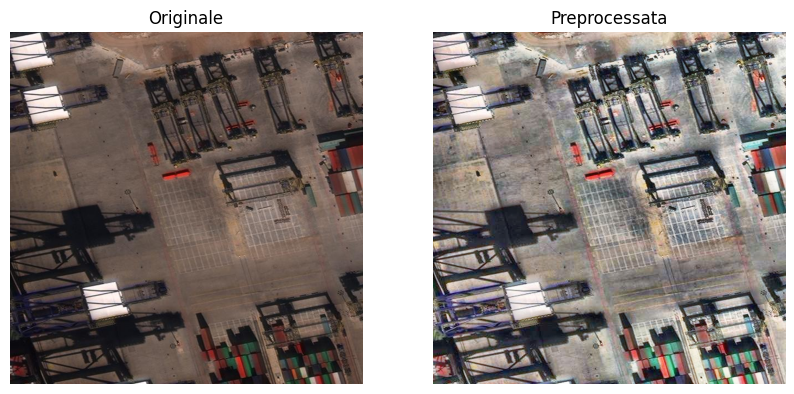

Processing Images: 100%|████████████████████████████████████████████████████████████| 275/275 [00:01<00:00, 161.86it/s]

Immagine preprocessata a caso: img13075_jpg.rf.5e0f812a3a23ebb30779736f49eb582a.jpg


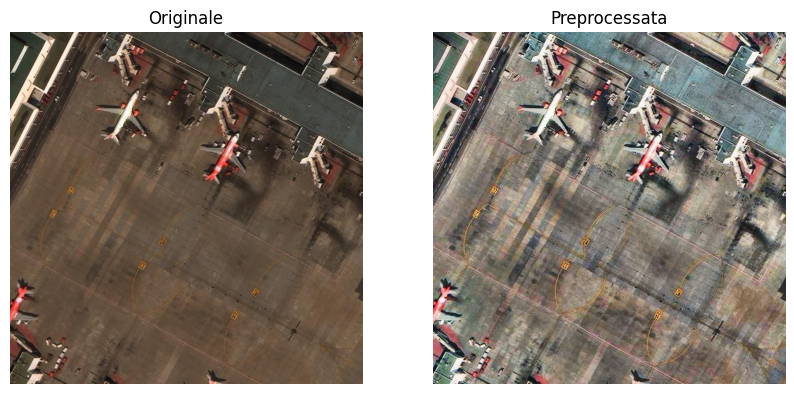

Preprocessing completato con successo.


In [ ]:
# Application of the CLAHE and Gamma Correction augmentation techniques


images_path = "J:/xView/images"
sets = ["train", "val", "test"]  # Only train and val will be processed

# Function for CLAHE (Contrast Limited Adaptive Histogram Equalization)
def applyClahe(img):
    img_b, img_g, img_r = cv2.split(img)

    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    img_b = clahe.apply(img_b)
    img_g = clahe.apply(img_g)
    img_r = clahe.apply(img_r)

    img_clahe_bgr = cv2.merge([img_b, img_g, img_r])
    return img_clahe_bgr

# Function for Gamma Correction
def applyGamma(img, gamma=1.2):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255 for i in range(256)]).astype("uint8")
    img_gamma_corrected = cv2.LUT(img, table)
    return img_gamma_corrected

# Preprocessing function
def preprocessImages(input_folder, output_folder):
    img_files = os.listdir(input_folder)

    # Randomly selecting 30% of the images
    num_images_to_process = int(len(img_files) * 0.3)
    selected_images = set(random.sample(img_files, num_images_to_process))  # Uses a set for optimization

    for img_file in tqdm(img_files, desc="Processing Images"):
        img_path = os.path.join(input_folder, img_file)
        output_path = os.path.join(output_folder, img_file)

        if img_file in selected_images:
            # Loads the image
            img = cv2.imread(img_path)
            if img is None:
                continue  # Skipping those that are not valid

            # Applying CLAHE and Gamma Correction
            img = applyClahe(img)
            img = applyGamma(img)

            # Saves the processed image
            cv2.imwrite(output_path, img)
        else:
            # Copies those not processed
            shutil.copy(img_path, output_path)

    return list(selected_images)  # Returns the list of the preprocessed images

# Looping through train and val
for split in ["train", "val"]:
    img_dir = os.path.join(images_path, split)
    output_dir = os.path.join(images_path, f"{split}_preprocessed")
    os.makedirs(output_dir, exist_ok=True)

    processed_images = preprocessImages(img_dir, output_dir)


    # Prints a random PROCESSED image
    if processed_images:
        random_image = random.choice(processed_images)
        print(f"Immagine preprocessata a caso: {random_image}")

        # Paths of the original and processed image
        original_img_path = os.path.join(img_dir, random_image)  # Original
        processed_img_path = os.path.join(output_dir, random_image)  # Processed

        # Loads the images
        original_img = cv2.imread(original_img_path)
        processed_img = cv2.imread(processed_img_path)

        # Converting from BGR to RGB for MatplotLib
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
        processed_img = cv2.cvtColor(processed_img, cv2.COLOR_BGR2RGB)

        # Shows the two images next to each other
        plt.figure(figsize=(10, 5))

        # Original image
        plt.subplot(1, 2, 1)
        plt.imshow(original_img)
        plt.axis("off")
        plt.title("Originale")

        # Processed image
        plt.subplot(1, 2, 2)
        plt.imshow(processed_img)
        plt.axis("off")
        plt.title("Preprocessata")

        plt.show()


# Deletes the old folders and renames the processed ones
shutil.rmtree(os.path.join(images_path, "train"))
shutil.rmtree(os.path.join(images_path, "val"))

os.rename(os.path.join(images_path, "train_preprocessed"), os.path.join(images_path, "train"))
os.rename(os.path.join(images_path, "val_preprocessed"), os.path.join(images_path, "val"))

print("Preprocessing completato con successo.")


In [ ]:
model = YOLO("yolo11s.pt")

model.train(
    data="J:/xView/data1.yaml",
    epochs=100,
    batch=16,
    imgsz=640,
    optimizer="SGD",
    momentum=0.937,
    lr0=0.01,
    device="cuda"
)

New https://pypi.org/project/ultralytics/8.3.78 available  Update with 'pip install -U ultralytics'
Ultralytics 8.3.77  Python-3.9.10 torch-1.10.2+cu113 CUDA:0 (NVIDIA GeForce RTX 4080, 16375MiB)
WARNING  Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolo11s.pt, data=J:/xView/data1.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda, workers=8, project=None, name=train22, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, c

train: Scanning J:\xView\train\labels.cache... 2204 images, 89 backgrounds, 0 corrupt: 100%|██████████| 2204/2204 [00:0
val: Scanning J:\xView\val\labels.cache... 275 images, 7 backgrounds, 0 corrupt: 100%|██████████| 275/275 [00:00<?, ?it


Plotting labels to runs\detect\train22\labels.jpg... 
optimizer: SGD(lr=0.01, momentum=0.937) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs\detect\train22
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100        12G      1.957      2.306      1.247        180        640: 100%|██████████| 138/138 [00:26<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0


                   all        275       4784      0.693       0.54      0.601      0.333

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      8.64G      1.824      1.463      1.138        225        640: 100%|██████████| 138/138 [00:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.583      0.648      0.666       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      9.04G       1.89      1.466      1.142        317        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<0

                   all        275       4784      0.458       0.43      0.405      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       6.9G       1.94      1.527      1.163        316        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.633      0.619      0.622      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      6.99G      1.958      1.461      1.174        229        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.649      0.603      0.619      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.6G      1.912      1.403      1.172        262        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.643      0.591      0.631      0.341



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      9.84G      1.933      1.377      1.159        594        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<0

                   all        275       4784      0.693        0.6      0.661      0.358



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      12.2G      1.867       1.32      1.161         99        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<0

                   all        275       4784      0.712      0.665      0.688      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      8.24G      1.912      1.341      1.155        339        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.678      0.617      0.647       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.54G      1.877       1.29      1.141        518        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.704      0.697      0.718      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      12.2G      1.805      1.232      1.137        257        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<0

                   all        275       4784      0.745      0.707      0.745        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      11.2G      1.819      1.215      1.132        166        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<0

                   all        275       4784      0.753      0.714      0.747      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      9.57G      1.818      1.224      1.129        178        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.766      0.692      0.734      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100       8.5G      1.802      1.193      1.122        679        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.775      0.694      0.743      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      10.1G      1.793       1.18      1.124         87        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.747      0.713      0.745      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100        11G      1.781      1.165      1.114        241        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<0

                   all        275       4784      0.747      0.724      0.771      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.91G      1.765      1.149      1.113        124        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784       0.79      0.731      0.774       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.65G      1.764      1.133      1.107        156        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.785       0.74      0.794      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.68G      1.742      1.123      1.101        385        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784       0.79      0.739      0.788      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.21G        1.7      1.094      1.094        142        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.798      0.757      0.799      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      9.28G      1.701      1.081      1.091        207        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.814      0.733      0.798      0.447



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      9.65G      1.714       1.07      1.088        428        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.801      0.756      0.799      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.27G       1.69      1.068      1.089        229        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.809      0.732      0.787      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      9.94G      1.677      1.064      1.086        115        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<0

                   all        275       4784      0.837      0.745      0.804      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      9.23G      1.698      1.054      1.086        176        640: 100%|██████████| 138/138 [00:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.812      0.787      0.822      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.71G      1.707       1.05      1.082        216        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.827      0.763      0.815       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      11.6G      1.692      1.029      1.077        172        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.816      0.765      0.806      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      8.35G      1.637      1.012      1.082        196        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.814      0.764      0.812      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      9.71G      1.664      0.997      1.072        475        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.817      0.784      0.822      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.38G      1.641     0.9931       1.07        229        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.811      0.777      0.821      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      10.8G      1.637      1.001      1.065        151        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.818      0.783      0.824      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      6.82G      1.621     0.9657      1.058        187        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.807      0.789       0.82      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      9.49G      1.648     0.9748      1.061        196        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.838      0.794      0.839       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      10.2G      1.631     0.9741      1.056         76        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<0

                   all        275       4784      0.813      0.781      0.814      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100        11G      1.617     0.9552      1.056        243        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<0

                   all        275       4784      0.828      0.803      0.831      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.04G      1.591     0.9392       1.05        276        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.836      0.791      0.835      0.486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      9.54G       1.59     0.9463      1.045        255        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.836      0.801      0.841      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      8.61G      1.599     0.9473      1.054        275        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.841      0.804      0.843      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       7.6G      1.593     0.9382      1.044        140        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.845      0.797      0.841      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      10.2G       1.57     0.9279      1.048        133        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.841      0.819      0.849      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      8.12G      1.576     0.9195      1.041        415        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.849      0.808      0.844      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.12G      1.589     0.9116      1.035         92        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.847      0.805       0.85      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      8.47G      1.573     0.9066      1.039        230        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.852      0.806      0.853      0.506



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      9.93G      1.576      0.901      1.028        575        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.849      0.806      0.845      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      11.7G      1.551     0.8995      1.038        108        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.849      0.813      0.847      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      8.03G      1.543     0.8832      1.037        214        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.863      0.799      0.852       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      9.13G      1.538     0.8845      1.027         91        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.842      0.806      0.839      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      8.55G      1.539     0.8878      1.032        243        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.853      0.821      0.857       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.29G      1.535      0.875      1.033        111        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784       0.84       0.82      0.853      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      8.05G      1.537     0.8721      1.029        366        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.861      0.812      0.854      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      8.62G      1.549     0.8678      1.018        424        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.856      0.823      0.865      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100        17G      1.516     0.8617      1.021        167        640: 100%|██████████| 138/138 [00:33<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:09<0

                   all        275       4784      0.846      0.805      0.845      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      6.74G      1.513     0.8511       1.02        204        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.862      0.816      0.861      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      8.46G      1.502     0.8361      1.017        139        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784       0.86      0.825      0.861      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.63G      1.518     0.8548      1.016        325        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.874       0.82      0.862      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      10.2G      1.471     0.8277      1.015        115        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.839      0.828       0.86      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.79G      1.487     0.8327      1.011        190        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.876      0.819      0.866      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      11.1G      1.493     0.8221      1.012        164        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<0

                   all        275       4784      0.861       0.83      0.864      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      10.1G      1.484     0.8254      1.005         67        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.877      0.825      0.868      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      10.5G      1.479      0.819      1.012        249        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.866      0.832      0.872      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         8G      1.446     0.8047      1.004        229        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.869      0.826       0.86      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.44G      1.462      0.805      1.005        150        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.865      0.831      0.866       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      10.8G      1.451     0.8028      1.001        218        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.864      0.835      0.868      0.531



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      9.25G      1.433     0.7968      1.004        203        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.869      0.829      0.866      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      10.3G      1.453     0.7932     0.9957        215        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.872      0.827      0.868      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      9.99G      1.449     0.7946     0.9913        393        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784       0.85      0.823      0.863      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      9.17G      1.435     0.7885     0.9917        276        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784       0.87       0.83      0.872      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      8.57G       1.46     0.7871     0.9921        264        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.875      0.838      0.873      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      10.1G      1.436     0.7839     0.9948        148        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.875       0.83      0.869      0.539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      11.1G      1.431     0.7781     0.9908        128        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.866      0.835      0.874      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.48G      1.393     0.7561     0.9884        280        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.875      0.833      0.871      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      6.74G        1.4     0.7623     0.9826        182        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784       0.87      0.826      0.871      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      8.66G      1.418     0.7646     0.9868        194        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.867      0.841      0.872       0.54



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      14.6G      1.392     0.7535     0.9831        139        640: 100%|██████████| 138/138 [00:19<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:12<0

                   all        275       4784      0.872      0.842      0.878      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.77G       1.36     0.7306     0.9786        167        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.869      0.838      0.873      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.62G      1.386     0.7496     0.9813        227        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.878       0.84      0.877      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      10.4G      1.383     0.7459     0.9774        311        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.872      0.842      0.874      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100       7.8G      1.378     0.7443     0.9776        213        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.886      0.847       0.88      0.553



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      8.87G      1.368     0.7343     0.9741        393        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.875      0.835      0.882      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      12.3G      1.372     0.7303     0.9691         83        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.875      0.842       0.88      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      9.95G      1.359     0.7216     0.9687        104        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.866      0.842      0.878      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.36G      1.381     0.7285     0.9679        227        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.882      0.838      0.881      0.556



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100        10G      1.356     0.7223       0.97        248        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.875      0.841      0.876      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      8.74G      1.335     0.7087      0.968        340        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784       0.88      0.835       0.88      0.554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      9.72G      1.357     0.7122     0.9612        115        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.877      0.846      0.881      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100        10G      1.351      0.715     0.9694        342        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<0

                   all        275       4784      0.885      0.846      0.883       0.56



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      9.23G      1.327     0.7067     0.9651        170        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.891      0.835      0.884      0.558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      12.3G      1.333     0.7001     0.9599         90        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.888       0.84      0.879      0.559



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      9.92G      1.307     0.6927     0.9574        263        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.886      0.843      0.881      0.564



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      11.3G       1.33     0.7014     0.9557        158        640: 100%|██████████| 138/138 [00:18<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.892      0.843      0.882      0.561


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      8.78G      1.303     0.6744     0.9589        127        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.892      0.834      0.878      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.03G        1.3     0.6687     0.9581        157        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.882      0.849      0.882      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      11.5G      1.304      0.669     0.9534        182        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<0

                   all        275       4784      0.879      0.852      0.883      0.562



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      9.92G      1.257     0.6482     0.9501        481        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.881      0.847      0.883      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      11.4G      1.281     0.6574     0.9531         73        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:07<0

                   all        275       4784      0.879      0.845      0.882      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      10.5G      1.264     0.6444     0.9503        262        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<0

                   all        275       4784       0.88      0.849      0.883      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      10.2G      1.258     0.6397     0.9442        206        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<0

                   all        275       4784      0.879      0.851      0.883      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      8.66G      1.267     0.6404     0.9433        140        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.878      0.847      0.882      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      8.33G      1.258     0.6411     0.9448        145        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.882      0.847      0.882      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      10.2G      1.239     0.6339     0.9418        225        640: 100%|██████████| 138/138 [00:17<00:00,  
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:01<0

                   all        275       4784      0.871      0.851      0.881      0.567



100 epochs completed in 0.595 hours.
Optimizer stripped from runs\detect\train22\weights\last.pt, 19.2MB
Optimizer stripped from runs\detect\train22\weights\best.pt, 19.2MB

Validating runs\detect\train22\weights\best.pt...
Ultralytics 8.3.77  Python-3.9.10 torch-1.10.2+cu113 CUDA:0 (NVIDIA GeForce RTX 4080, 16375MiB)
YOLO11s summary (fused): 100 layers, 9,413,961 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<0


                   all        275       4784      0.882      0.846      0.881      0.567
              Airplane         91        226       0.95       0.96      0.982      0.782
                  Ship        176       1146      0.906       0.92      0.952      0.631
               Vehicle        118       3412      0.791      0.658      0.709      0.288
Speed: 0.3ms preprocess, 1.8ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\train22


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002AA925844F0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

In [ ]:
# Path to the trained model
source_model = "runs/detect/train22/weights/best.pt"
destination = "J:/xView/best.pt"

# Copies the file in the final folder
shutil.copy(source_model, destination)

print(f"Modello salvato in: {destination}")

Modello salvato in: J:/xView/best.pt


In [ ]:
# Testing of the model against the test set obtained before

# Loading the trained model
model = YOLO("J:/xView/best.pt")

# Path to the test set folder
test_images_path = "J:/xView/images/test"

# Running the inference
results = model.predict(test_images_path, save=True)

print("Inferenza completata. I risultati sono stati salvati.")


image 1/276 J:\xView\images\test\img10329_jpg.rf.b57586fef134939d35ac9482db0f5164.jpg: 640x640 1 Airplane, 2 Vehicles, 35.3ms
image 2/276 J:\xView\images\test\img10329_jpg.rf.b57586fef134939d35ac9482db0f5164_dup.jpg: 640x640 1 Airplane, 2 Vehicles, 25.8ms
image 3/276 J:\xView\images\test\img1044_jpg.rf.28d607d6268564b8d5c9ad795623fa2b.jpg: 640x640 1 Airplane, 17 Vehicles, 29.0ms
image 4/276 J:\xView\images\test\img1045_jpg.rf.4a304425f4a80c8be293a0e1f2781a39.jpg: 640x640 12 Ships, 16 Vehicles, 25.0ms
image 5/276 J:\xView\images\test\img10676_jpg.rf.74568cbdaa01179590ee8b09438decc4.jpg: 640x640 (no detections), 28.2ms
image 6/276 J:\xView\images\test\img10744_jpg.rf.f6758f43ad384ec1115835134bf47d0b.jpg: 640x640 2 Vehicles, 25.7ms
image 7/276 J:\xView\images\test\img10845_jpg.rf.110eae4e27e9619e08213b53a9a08cea.jpg: 640x640 1 Ship, 25.1ms
image 8/276 J:\xView\images\test\img10948_jpg.rf.6177061733b1df0f5e36efe55ded6e9d.jpg: 640x640 2 Airplanes, 3 Vehicles, 20.2ms
image 9/276 J:\xView\im

In [ ]:
# The following blocks will show the results

# Loading the file with the training metrics
metrics_path = "runs/detect/train22/results.csv"
df = pd.read_csv(metrics_path)

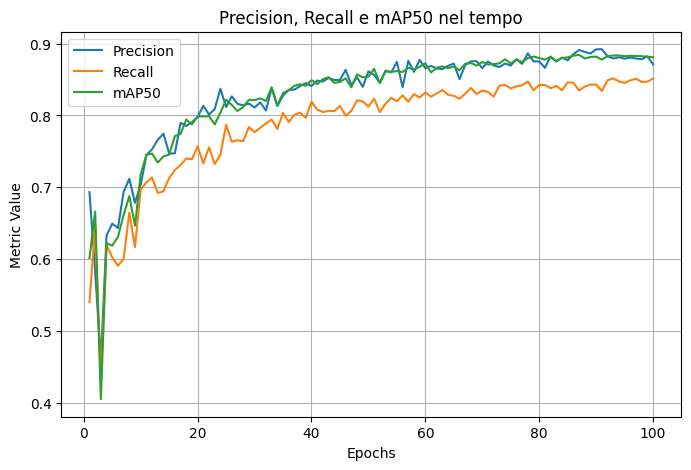

In [ ]:
# This is to force jupyter lab to show the plotting
%matplotlib inline

def plotPrecisionRecallMap(metrics_path):
    df = pd.read_csv(metrics_path)


    plt.figure(figsize=(8, 5))
    plt.plot(df["epoch"], df["metrics/precision(B)"], label="Precision", linestyle="-")
    plt.plot(df["epoch"], df["metrics/recall(B)"], label="Recall", linestyle="-")
    plt.plot(df["epoch"], df["metrics/mAP50(B)"], label="mAP50", linestyle="-")

    plt.xlabel("Epochs")
    plt.ylabel("Metric Value")
    plt.title("Precision, Recall e mAP50 nel tempo")
    plt.legend()
    plt.grid(True)
    plt.show()

plotPrecisionRecallMap(metrics_path)

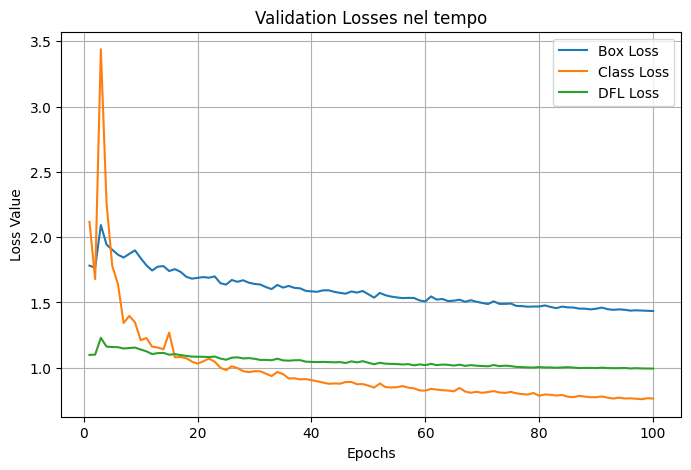

In [ ]:
%matplotlib inline

def plotLosses(metrics_path):
    df = pd.read_csv(metrics_path)

    plt.figure(figsize=(8, 5))

    plt.plot(df["epoch"], df["val/box_loss"], label="Box Loss", linestyle="-")
    plt.plot(df["epoch"], df["val/cls_loss"], label="Class Loss", linestyle="-")
    plt.plot(df["epoch"], df["val/dfl_loss"], label="DFL Loss", linestyle="-")

    plt.xlabel("Epochs")
    plt.ylabel("Loss Value")
    plt.title("Validation Losses nel tempo")
    plt.legend()
    plt.grid(True)
    plt.show()

plotLosses(metrics_path)

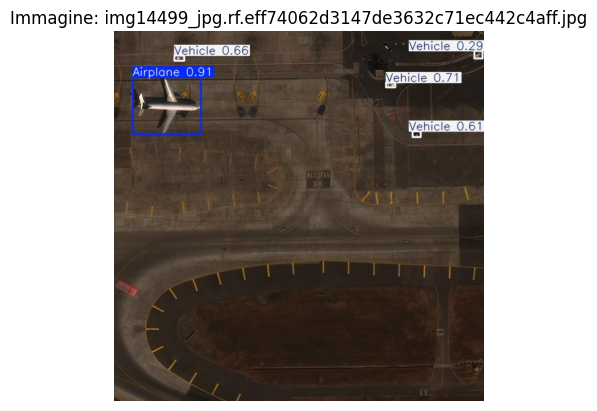

In [ ]:
# This block is used to print an image with the predictions and bounding boxes

def showRandom():
    # eFolder of the predicted images
    predict_dir = "runs/detect/predict"

    images = [img for img in os.listdir(predict_dir) if img.endswith((".jpg"))]

    # Picks a random image
    random_image = random.choice(images)

    image_path = os.path.join(predict_dir, random_image)

    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converting from BGR to RGB due to OpenCV2

    # Shows the image
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Immagine: {random_image}")
    plt.show()


showRandom()